In [409]:
import tensorflow as tf   
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.layers import GlobalMaxPooling2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Model

import os,cv2
from PIL import Image
from PIL import ImageMath
import os
import pandas as pd



import os
import random
import shutil
import glob
import splitfolders
splitfolders.ratio('Type_Pokemon', output="train_split_2", seed=1000, ratio=(.8, 0.1,0.1)) 


In [415]:
# import OS module

# Get the list of all files and directories
path = "Type_Pokemon"
dir_list = os.listdir(path)
print("Files and directories in '", path, "' :")
# prints all files
#print(dir_list)
#print(len(dir_list))

Files and directories in ' Type_Pokemon ' :


In [416]:
#setting the train/tests for the data set


data_dir= 'Type_Pokemon'



batch_size = 32
img_height = 180
img_width = 180

train_ds = tf.keras.utils.image_dataset_from_directory(
data_dir,
validation_split=0.2,
subset="training",
seed=123,
image_size=(img_height, img_width),
batch_size=batch_size)



val_ds = tf.keras.utils.image_dataset_from_directory(
data_dir,
validation_split=0.2,
subset="validation",
seed=123,
image_size=(img_height, img_width),
batch_size=batch_size)



Found 851 files belonging to 18 classes.
Using 681 files for training.
Found 851 files belonging to 18 classes.
Using 170 files for validation.


['bug', 'dark', 'dragon', 'electric', 'fairy', 'fighting', 'fire', 'flying', 'ghost', 'grass', 'ground', 'ice', 'normal', 'poison', 'psychic', 'rock', 'steel', 'water']


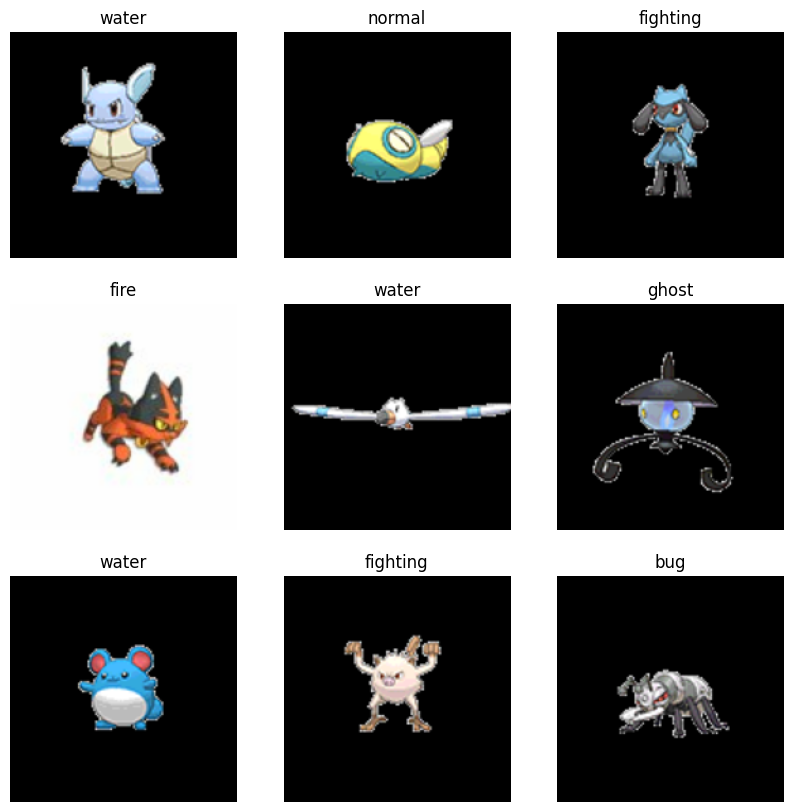

In [417]:
class_names = train_ds.class_names
print(class_names)


import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [418]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

normalization_layer = tf.keras.layers.Rescaling(1./255)


normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

(32, 180, 180, 3)
(32,)
0.0 1.0


In [419]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

num_classes = 18

model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes)
])


model.compile(
  optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])


keras_model = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=15
)


#9 okay

Epoch 1/15
22/22 [==============================] - 7s 227ms/step - loss: 2.7024 - accuracy: 0.1762 - val_loss: 2.5778 - val_accuracy: 0.2176
Epoch 2/15
22/22 [==============================] - 5s 225ms/step - loss: 2.4440 - accuracy: 0.2364 - val_loss: 2.5930 - val_accuracy: 0.2118
Epoch 3/15
22/22 [==============================] - 5s 238ms/step - loss: 2.1507 - accuracy: 0.3289 - val_loss: 2.7757 - val_accuracy: 0.1765
Epoch 4/15
22/22 [==============================] - 5s 211ms/step - loss: 1.6191 - accuracy: 0.4802 - val_loss: 3.1502 - val_accuracy: 0.1706
Epoch 5/15
22/22 [==============================] - 5s 242ms/step - loss: 1.0183 - accuracy: 0.7004 - val_loss: 3.8030 - val_accuracy: 0.1824
Epoch 6/15
22/22 [==============================] - 5s 240ms/step - loss: 0.5842 - accuracy: 0.8326 - val_loss: 5.0434 - val_accuracy: 0.1941
Epoch 7/15
22/22 [==============================] - 5s 237ms/step - loss: 0.5147 - accuracy: 0.8253 - val_loss: 5.1391 - val_accuracy: 0.2000
Epoch 

In [420]:
print(val_ds)
model.save('Pokemon_Type_Class_9.h5')

<PrefetchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


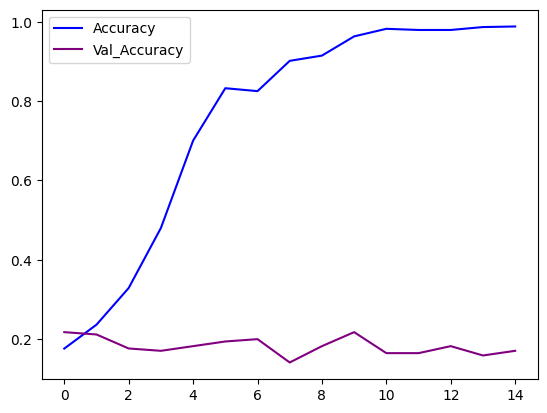

In [421]:
# Plot accuracy per iteration
plt.plot(keras_model.history['accuracy'], label='Accuracy', color='blue')
plt.plot(keras_model.history['val_accuracy'], label='Val_Accuracy', color='purple')
plt.legend()

In [422]:


image_count = len(list(data_dir))
print(image_count)

image_list = []
label_list = []
label_map_dict = {}
count_label = 0

for class_name in os.listdir(data_dir):
    class_path = os.path.join(data_dir, class_name)
    label_map_dict[class_name]=count_label

    for image_name in os.listdir(class_path):
        image_path = os.path.join(class_path, image_name)

        label_list.append(count_label)
        image_list.append(image_path)

    count_label += 1
        

print ("TEST")
print (label_list)




val_size = int(image_count * 0.2)
train_ds = list_ds.skip(val_size)
val_ds = list_ds.take(val_size)


print(tf.data.experimental.cardinality(train_ds).numpy())
print(tf.data.experimental.cardinality(val_ds).numpy())



def get_label(file_path):
  # Convert the path to a list of path components
  parts = tf.strings.split(file_path, os.path.sep)
  # The second to last is the class-directory
  one_hot = parts[-2] == class_names
  # Integer encode the label
  return tf.argmax(one_hot)


def decode_img(img):
  # Convert the compressed string to a 3D uint8 tensor
  img = tf.io.decode_jpeg(img, channels=3)
  # Resize the image to the desired size
  return tf.image.resize(img, [img_height, img_width])


def process_path(file_path):
  label = get_label(file_path)
  # Load the raw data from the file as a string
  img = tf.io.read_file(file_path)
  img = decode_img(img)
  return img, label



train_ds = train_ds.map(process_path, num_parallel_calls=AUTOTUNE)
val_ds = val_ds.map(process_path, num_parallel_calls=AUTOTUNE)


for image, label_list in train_ds.take(1):
  print("Image shape: ", image.numpy().shape)
  print("Label: ", label_list.numpy())
  print("OKAUY")
  

array_label = np.array(label_list)
print(array_label)
print(label_map_dict)
print(image_list)

12
TEST
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9

<PIL.Image.Image image mode=RGB size=180x180 at 0x169251BCD48>
1/1 [==============================] - 0s 205ms/step


'grass'

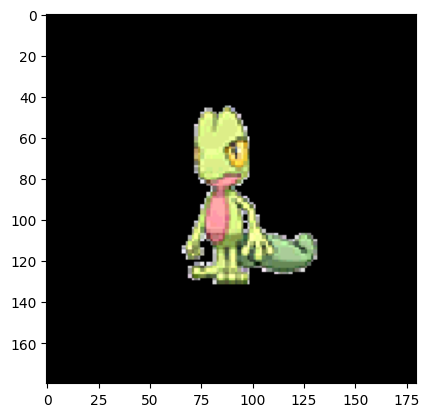

In [424]:
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions
from keras.applications.vgg16 import VGG16
from keras import models  

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


# label mapping
labels = '''bug dark dragon electric fairy fighthing fire flying ghost grass ground ice normal poision psychic rock steel water'''.split()


model = models.load_model('Pokemon_Type_Class_9.h5')
 
image = load_img('Type_Pokemon/grass/treecko.png', target_size=(180, 180))

print(image)
img = np.array(image)

plt.imshow(img)



n = np.array(img)
 
# reshape a given image

#img = img / 255.0
p = n.reshape(1, 180, 180, 3)



# load image into the model
label_Pred = (labels[model.predict(p).argmax()])
 

label_Pred